In [2]:
import pandas_datareader as pdr
key="e0874854e684a3ddffe2fff66e9f038e76fb393b"

In [3]:
df = pdr.get_data_tiingo('AAPL', api_key=key)

In [4]:
df.to_csv('APPL.csv')

In [5]:
import pandas as pd

In [6]:
df=pd.read_csv('APPL.csv')

In [7]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2016-04-12 00:00:00+00:00,110.44,110.50,108.66,109.34,27232325,25.675835,25.689784,25.262009,25.420100,108929300,0.0,1.0
1,AAPL,2016-04-13 00:00:00+00:00,112.04,112.34,110.80,110.80,33257316,26.047814,26.117560,25.759530,25.759530,133029264,0.0,1.0
2,AAPL,2016-04-14 00:00:00+00:00,112.10,112.39,111.33,111.62,25473923,26.061763,26.129184,25.882748,25.950169,101895692,0.0,1.0
3,AAPL,2016-04-15 00:00:00+00:00,109.85,112.30,109.73,112.11,46938969,25.538668,26.108260,25.510770,26.064088,187755876,0.0,1.0
4,AAPL,2016-04-18 00:00:00+00:00,107.48,108.95,106.94,108.89,60821461,24.987674,25.329430,24.862132,25.315481,243285844,0.0,1.0


In [8]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,AAPL,2021-04-05 00:00:00+00:00,125.900,126.1601,123.07,123.87,88651175,125.900,126.1601,123.07,123.87,88651175,0.0,1.0
1254,AAPL,2021-04-06 00:00:00+00:00,126.210,127.1300,125.65,126.50,80171253,126.210,127.1300,125.65,126.50,80171253,0.0,1.0
1255,AAPL,2021-04-07 00:00:00+00:00,127.900,127.9200,125.14,125.83,83466716,127.900,127.9200,125.14,125.83,83466716,0.0,1.0
1256,AAPL,2021-04-08 00:00:00+00:00,130.360,130.3900,128.52,128.95,88844591,130.360,130.3900,128.52,128.95,88844591,0.0,1.0
1257,AAPL,2021-04-09 00:00:00+00:00,132.995,133.0400,129.47,129.80,106686703,132.995,133.0400,129.47,129.80,106686703,0.0,1.0


In [9]:
df1=df.reset_index()['close']

In [10]:
df1

0       110.440
1       112.040
2       112.100
3       109.850
4       107.480
         ...   
1253    125.900
1254    126.210
1255    127.900
1256    130.360
1257    132.995
Name: close, Length: 1258, dtype: float64

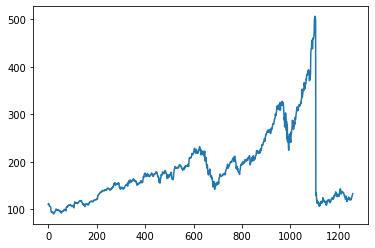

In [11]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [ ]:
### LSTM are sensitive to the scale of the data. So We apply MinMax scaler

In [12]:
import numpy as np

In [13]:
df1

0       110.440
1       112.040
2       112.100
3       109.850
4       107.480
         ...   
1253    125.900
1254    126.210
1255    127.900
1256    130.360
1257    132.995
Name: close, Length: 1258, dtype: float64

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [15]:
print(df1)

[[0.04834636]
 [0.05219483]
 [0.05233915]
 ...
 [0.09034275]
 [0.09625977]
 [0.10259771]]


In [16]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size:],df1[training_size:len(df1),:1]

In [17]:
training_size,test_size

(817, 441)

In [18]:
train_data

array([[0.04834636],
       [0.05219483],
       [0.05233915],
       [0.04692724],
       [0.0412267 ],
       [0.03985568],
       [0.04038485],
       [0.03759471],
       [0.03689717],
       [0.035454  ],
       [0.03369814],
       [0.01799158],
       [0.01079976],
       [0.00817799],
       [0.00793746],
       [0.01164161],
       [0.00926037],
       [0.00697535],
       [0.00572459],
       [0.00589296],
       [0.0074083 ],
       [0.00521948],
       [0.        ],
       [0.00043295],
       [0.00851473],
       [0.00757667],
       [0.01015033],
       [0.00928443],
       [0.01173782],
       [0.01464823],
       [0.018184  ],
       [0.02232111],
       [0.02422129],
       [0.02407697],
       [0.02289838],
       [0.01953097],
       [0.01775105],
       [0.01823211],
       [0.01993987],
       [0.02090198],
       [0.02068551],
       [0.02239327],
       [0.02042093],
       [0.01683704],
       [0.01712568],
       [0.01635598],
       [0.01734215],
       [0.012

In [19]:
import numpy
#convert an array of values into a dataset matrix
def create_dataset(dataset,time_step=1):
    dataX,dataY = [],[]
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]  ###i=0,1,2,3,-------,99
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return numpy.array(dataX),numpy.array(dataY)

In [20]:
# reshape into X=t,t+1,t+2,t+3, and Y=t+4
time_step = 100 
X_train, Y_train = create_dataset(train_data, time_step)
X_test,Y_test =  create_dataset(test_data,time_step)

In [21]:
print(X_train.shape),print(Y_train.shape)

(716, 100)
(716,)


(None, None)

In [22]:
print(X_test.shape),print(Y_test.shape)

(340, 100)
(340,)


(None, None)

In [23]:
#reshape input to be [samples, time steps, features] which is required for LSTM
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [24]:
### Create the Stacked LSTM Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [25]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 9s 325ms/step - loss: 0.0152 - val_loss: 0.0516
Epoch 2/100
12/12 [==============================] - 2s 207ms/step - loss: 0.0028 - val_loss: 0.0253
Epoch 3/100
12/12 [==============================] - 2s 208ms/step - loss: 0.0012 - val_loss: 0.0234
Epoch 4/100
12/12 [==============================] - 2s 208ms/step - loss: 7.1064e-04 - val_loss: 0.0200
Epoch 5/100
12/12 [==============================] - 2s 208ms/step - loss: 4.2962e-04 - val_loss: 0.0192
Epoch 6/100
12/12 [==============================] - 2s 206ms/step - loss: 3.7994e-04 - val_loss: 0.0187
Epoch 7/100
12/12 [==============================] - 2s 205ms/step - loss: 3.3978e-04 - val_loss: 0.0187
Epoch 8/100
12/12 [==============================] - 3s 211ms/step - loss: 4.1985e-04 - val_loss: 0.0183
Epoch 9/100
12/12 [==============================] - 3s 213ms/step - loss: 4.7675e-04 - val_loss: 0.0175
Epoch 10/100
12/12 [==============================] - 2s 208ms/step

In [28]:
import tensorflow as tf


In [29]:
tf.__version__

'2.4.1'

In [30]:
### Prediction and check performence metrices
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [31]:
###Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [32]:
### Calculate RMSE  performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(Y_train,train_predict))

164.59603521058827

In [33]:
###Test Data RMSE
math.sqrt(mean_squared_error(Y_test,test_predict))

252.1183708295492

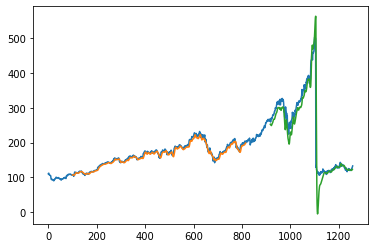

In [34]:
###Plotting
# Shift train predictions for plotting
look_back=100
trainPredictPlot=numpy.empty_like(df1)
trainPredictPlot[:, :]=np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :]=train_predict
#shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :]=numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1: len(df1)-1, :]=test_predict
#plot baseline and predicitons 
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [35]:
len(test_data)

441

In [36]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [37]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [38]:
temp_input

[0.06956103427540589,
 0.07206253758268188,
 0.06987372218881538,
 0.0666025255562237,
 0.06806975345760674,
 0.0649428743235117,
 0.056548406494287384,
 0.05972339146121464,
 0.06179194227300061,
 0.06313890559230306,
 0.06905592303066743,
 0.07788334335538183,
 0.07874924834636199,
 0.07841250751653633,
 0.07675285628382439,
 0.08036079374624172,
 0.08187612748045697,
 0.07562236921226695,
 0.0791340950090198,
 0.07713770294648226,
 0.07562236921226695,
 0.0902946482260974,
 0.0901262778111846,
 0.09226698737221883,
 0.08734816596512324,
 0.0911365003006614,
 0.09991581479254358,
 0.09770294648226097,
 0.10013229104028859,
 0.11148526758869509,
 0.10710763680096214,
 0.1043415514131088,
 0.10186410102224891,
 0.09397474443776305,
 0.0978232110643415,
 0.08721587492483462,
 0.09760673481659649,
 0.10032471437161755,
 0.09294046903187009,
 0.09250751653638006,
 0.09753457606734811,
 0.09277209861695729,
 0.08851473241130486,
 0.09017438364401681,
 0.10027660853878534,
 0.11191822008418

In [39]:
### demonstrate prediction for next 10 days
from numpy import array
lst_output=[]
n_steps=100
i=0
while(i<30):
  if(len(temp_input)>100):
    #print(temp_input)
    x_input=np.array(temp_input[1:])
    print("{} day input {}".format(i,x_input))
    x_input=x_input.reshape(1,-1)
    x_input=x_input.reshape((1,n_steps,1))
    ###print(x_input)
    yhat=model.predict(x_input, verbose=0)
    print("{} day output {}".format(i,yhat))
    temp_input.extend(yhat[0].tolist())
    temp_input=temp_input[1:]
    #print(temp_input)
    lst_output.extend(yhat.tolist())
    i=i+1
  else:
      x_input=x_input.reshape((1,n_steps,1))
      yhat=model.predict(x_input,verbose=0)
      print(yhat[0])
      temp_input.extend(yhat[0].tolist())
      print(len(temp_input))
      lst_output.extend(yhat.tolist())
      i=i+1

print(lst_output)

[0.08669757]
101
1 day input [0.07206254 0.06987372 0.06660253 0.06806975 0.06494287 0.05654841
 0.05972339 0.06179194 0.06313891 0.06905592 0.07788334 0.07874925
 0.07841251 0.07675286 0.08036079 0.08187613 0.07562237 0.0791341
 0.0771377  0.07562237 0.09029465 0.09012628 0.09226699 0.08734817
 0.0911365  0.09991581 0.09770295 0.10013229 0.11148527 0.10710764
 0.10434155 0.1018641  0.09397474 0.09782321 0.08721587 0.09760673
 0.10032471 0.09294047 0.09250752 0.09753458 0.0927721  0.08851473
 0.09017438 0.10027661 0.11191822 0.11720986 0.12647023 0.1270475
 0.12440168 0.11244738 0.10010824 0.10535177 0.10739627 0.10487072
 0.11316897 0.11165364 0.11201443 0.10984967 0.10835839 0.10773301
 0.10831028 0.10306675 0.09741431 0.09469633 0.09508118 0.0857727
 0.08543596 0.08420926 0.07372219 0.07437162 0.09007817 0.08365604
 0.07629585 0.07165364 0.07475646 0.06258569 0.07395069 0.07129284
 0.07605532 0.0738184  0.08093806 0.08473842 0.08279014 0.07261575
 0.0713169  0.07949489 0.07745039 0.

In [40]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [41]:
import matplotlib.pyplot as plt


In [42]:
len(df1)

1258

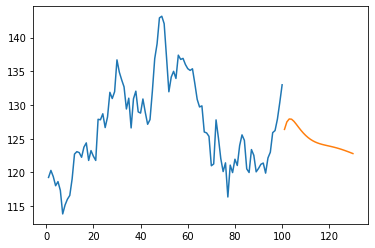

In [43]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

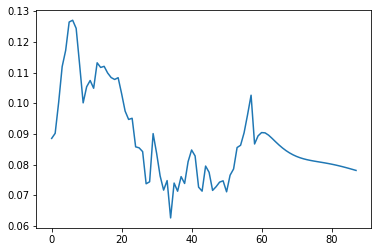

In [44]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [45]:
df3=scaler.inverse_transform(df3).tolist()

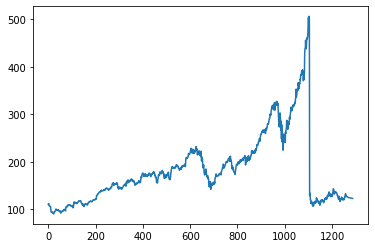

In [46]:
plt.plot(df3)